In [41]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib as plt
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [2]:
engine = create_engine("sqlite:///hawaii.sqlite")

# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [3]:
# Create our session (link) from Python to the DB
session = Session(engine)

## D1: Determine the Summary Statistics for June

In [4]:
# 1. Import the sqlalchemy extract function.
from sqlalchemy import extract

# 2. Write a query that filters the Measurement table to retrieve the temperatures for the month of June. 
june_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 6)


In [5]:
#  3. Convert the June temperatures to a list.
june_temps_list = [temp.tobs for temp in june_temps]

In [16]:
# 4. Create a DataFrame from the list of temperatures for the month of June. 
june_df = pd.DataFrame(june_temps_list, columns=['June Temps'])

In [17]:
# 5. Calculate and print out the summary statistics for the June temperature DataFrame.
june_df.describe()

,June Temps
count,1700.000000
mean,74.944118
std,3.257417
min,64.000000
25%,73.000000
50%,75.000000
75%,77.000000
max,85.000000


## D2: Determine the Summary Statistics for December

In [13]:
# 6. Write a query that filters the Measurement table to retrieve the temperatures for the month of December.
dec_temps = session.query(Measurement).filter(extract('month', Measurement.date) == 12)

In [14]:
# 7. Convert the December temperatures to a list.
dec_temps_list = [temp.tobs for temp in dec_temps]

In [18]:
# 8. Create a DataFrame from the list of temperatures for the month of December. 
dec_df = pd.DataFrame(dec_temps_list, columns=['December Temps'])

In [19]:
# 9. Calculate and print out the summary statistics for the Decemeber temperature DataFrame.
dec_df.describe()

,December Temps
count,1517.000000
mean,71.041529
std,3.745920
min,56.000000
25%,69.000000
50%,71.000000
75%,74.000000
max,83.000000


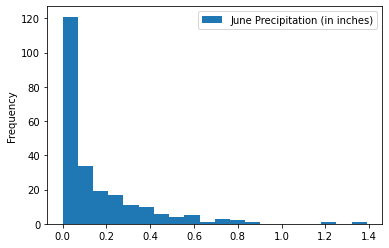

In [52]:
# Additional query to gather more weather data for the month of June
june_prcp = session.query(Measurement.prcp).filter(extract('month', Measurement.date)==6).\
filter(Measurement.station =='USC00519281')
june_prcp_list = [precip.prcp for precip in june_prcp]
juneprcp_df = pd.DataFrame(june_prcp_list, columns=["June Precipitation (in inches)"])
juneprcp_df.plot.hist(bins=20)


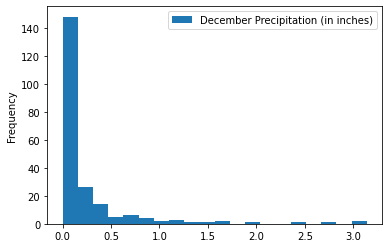

In [50]:
# Additional query to gather more weather data for the month of December
dec_prcp = session.query(Measurement.prcp).filter(extract('month', Measurement.date)==12).\
filter(Measurement.station =='USC00519281')
dec_prcp_list = [precip.prcp for precip in dec_prcp]
decprcp_df = pd.DataFrame(dec_prcp_list, columns=["December Precipitation (in inches)"])
decprcp_df.plot.hist(bins=20)